### Goal: exploration of the dataframe, understand the data

In [36]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
DATASET_BEERADVOCATE = 'DATA/BeerAdvocate/'
DATASET_MATCHEDBEER = 'DATA/matched_beer_data/'
DATASET_RATEBEER = 'DATA/RateBeer/'

In [22]:
df_adv_beer = pd.read_csv(DATASET_BEERADVOCATE + 'beers.csv')
df_adv_breweries = pd.read_csv(DATASET_BEERADVOCATE + 'breweries.csv')
df_adv_users = pd.read_csv(DATASET_BEERADVOCATE + 'users.csv')

print('shape of all datasets: \n',
     'beer',df_adv_beer.shape,'\n',
     'breweries',df_adv_breweries.shape,'\n',
     'users',df_adv_users.shape)

shape of all datasets: 
 beer (280823, 15) 
 breweries (16758, 4) 
 users (153704, 6)


In [30]:
df_adv_beer.sample(5)

,beer_id,beer_name,brewery_id,brewery_name,style,nbr_ratings,nbr_reviews,avg,ba_score,bros_score,abv,avg_computed,zscore,nbr_matched_valid_ratings,avg_matched_valid_ratings
279468,158590,Belgian CocoNorm,21593,Thirsty Monk,American Porter,5,1,3.24,NaN,NaN,6.4,3.718000,NaN,0,NaN
267122,163943,Blanche Aux Fruits Rouges,18844,Brasserie Artisanale du Val D'Ainan,Fruit / Vegetable Beer,0,0,NaN,NaN,NaN,5.5,NaN,NaN,0,NaN
14974,258051,Citra Double IPA,25618,La Succursale Brasserie Artisanale,American Double / Imperial IPA,1,0,4.00,NaN,NaN,7.2,4.000000,NaN,0,NaN
109739,45417,Fisherman's Dunkelweizen,8325,Cape Ann Brewing Company,Dunkelweizen,0,0,NaN,NaN,NaN,7.0,NaN,NaN,0,NaN
121437,37567,Dark Stout,14359,The Defiant Brewing Company,Milk / Sweet Stout,3,1,4.06,NaN,NaN,NaN,4.023333,NaN,0,NaN


In [34]:
df_adv_beer.dtypes.value_counts()

float64    7
int64      5
object     3
dtype: int64

<AxesSubplot:>

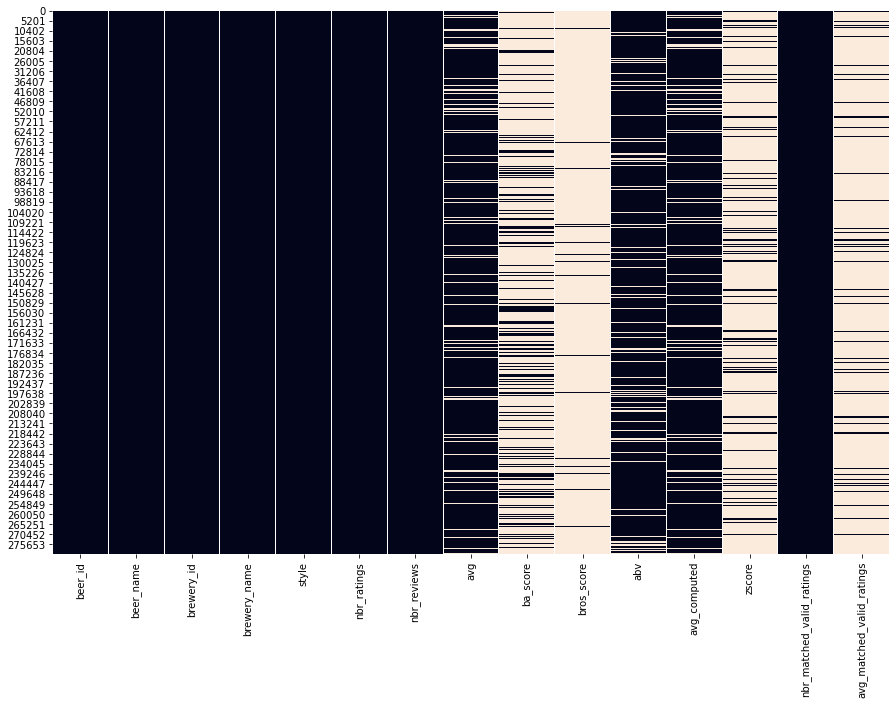

In [38]:
plt.figure(figsize=(15,10))
sns.heatmap(df_adv_beer.isna(), cbar=False)

In [39]:
(df_adv_beer.isna().sum()/df_adv_beer.shape[0]).sort_values(ascending=True)

beer_id                      0.000000
beer_name                    0.000000
brewery_id                   0.000000
brewery_name                 0.000000
style                        0.000000
nbr_ratings                  0.000000
nbr_reviews                  0.000000
nbr_matched_valid_ratings    0.000000
avg                          0.116903
avg_computed                 0.116946
abv                          0.128280
ba_score                     0.782069
zscore                       0.856547
avg_matched_valid_ratings    0.899324
bros_score                   0.979695
dtype: float64

In [42]:
df_adv_breweries.shape

(16758, 4)

In [41]:
df_adv_breweries.dtypes

id            int64
location     object
name         object
nbr_beers     int64
dtype: object

In [15]:
df_adv_breweries.isna().sum()/df_adv_breweries.shape[0]

id           0.0
location     0.0
name         0.0
nbr_beers    0.0
dtype: float64

In [43]:
df_adv_users.shape

(153704, 6)

In [46]:
df_adv_users.dtypes

nbr_ratings      int64
nbr_reviews      int64
user_id         object
user_name       object
joined         float64
location        object
dtype: object

In [16]:
df_adv_users.isna().sum()/df_adv_users.shape[0]

nbr_ratings    0.000000
nbr_reviews    0.000000
user_id        0.000000
user_name      0.000007
joined         0.017254
location       0.203502
dtype: float64

<AxesSubplot:>

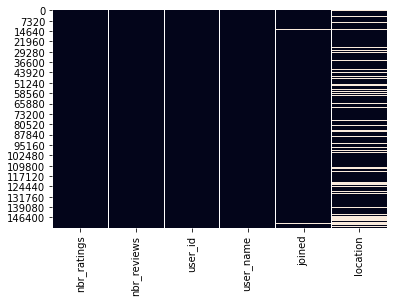

In [47]:
sns.heatmap(df_adv_users.isna(), cbar=False)